# Aprendizaje no supervisado: Trade&Ahead

**Puntos: 60**

### Contexto

El mercado de valores ha demostrado constantemente ser un buen lugar para invertir y ahorrar para el futuro. Hay muchas razones convincentes para invertir en acciones. Puede ayudar a combatir la inflación, crear riqueza y también proporciona algunos beneficios fiscales. Los buenos rendimientos constantes de las inversiones durante un largo período de tiempo también pueden crecer mucho más de lo que parece posible. Además, gracias al poder del interés compuesto, cuanto antes se empieza a invertir, mayor es el corpus que se puede tener para la jubilación. En general, invertir en acciones puede ayudar a cumplir las aspiraciones financieras de la vida.

Es importante mantener una cartera diversificada al invertir en acciones para maximizar las ganancias bajo cualquier condición de mercado. Tener una cartera diversificada tiende a generar mayores rendimientos y enfrentar un menor riesgo al moderar las pérdidas potenciales cuando el mercado está a la baja. A menudo es fácil perderse en un mar de métricas financieras para analizar mientras se determina el valor de una acción, y hacer lo mismo para una multitud de acciones para identificar las opciones correctas para un individuo puede ser una tarea tediosa. Al hacer un análisis de conglomerados, se pueden identificar las acciones que exhiben características similares y las que exhiben una correlación mínima. Esto ayudará a los inversores a analizar mejor las acciones en diferentes segmentos del mercado y ayudará a protegerse contra los riesgos que podrían hacer que la cartera sea vulnerable a pérdidas.


### Objetivo

Trade&Ahead es una firma de consultoría financiera que brinda a sus clientes estrategias de inversión personalizadas. Lo contrataron como científico de datos y le proporcionaron datos que incluyen el precio de las acciones y algunos indicadores financieros para algunas empresas que cotizan en la Bolsa de Valores de Nueva York. Le han asignado las tareas de analizar los datos, agrupar las acciones en función de los atributos proporcionados y compartir información sobre las características de cada grupo.

### Diccionario de datos

- Ticker Symbol:  una abreviatura utilizada para identificar de forma única las acciones que cotizan en bolsa de una acción en particular en un mercado de valores en particular
- Company:  Nombre de la empresa
- GICS Sector:  El sector económico específico asignado a una empresa por el Estándar de Clasificación de la Industria Global (GICS) que mejor define sus operaciones comerciales
- GICS Sub Industry:  el grupo de subindustria específico asignado a una empresa por el Estándar de Clasificación de la Industria Global (GICS) que mejor define sus operaciones comerciales
- Current Price:  Precio actual de la acción en dólares
- Price Change:  cambio porcentual en el precio de las acciones en 13 semanas
- Volatility:  Desviación estándar del precio de las acciones en las últimas 13 semanas
- ROE:  una medida del rendimiento financiero que se calcula dividiendo los ingresos netos por el patrimonio de los accionistas (el patrimonio de los accionistas es igual a los activos de una empresa menos su deuda)
- Cash Ratio:  La relación entre las reservas totales de efectivo y equivalentes de efectivo de una empresa y sus pasivos corrientes totales.
- Net Cash Flow:  La diferencia entre las entradas y salidas de caja de una empresa (en dólares)
- Net Income:  Ingresos menos gastos, intereses e impuestos (en dólares)
- Earnings Per Share:  la utilidad neta de la empresa dividida por el número de acciones ordinarias que tiene en circulación (en dólares)
- Estimated Shares Outstanding:  Acciones de la Compañía actualmente en poder de todos sus accionistas
- P/E Ratio:  relación entre el precio actual de las acciones de la empresa y las ganancias por acción
- P/B Ratio:  relación entre el precio de las acciones de la empresa por acción y su valor en libros por acción (el valor en libros de una empresa es la diferencia neta entre los activos totales y los pasivos totales de esa empresa)

## Importación de bibliotecas y datos necesarios

In [1]:
# matematica y manipulación de datos
import numpy as np
import pandas as pd

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# maximos de columnas
pd.set_option("display.max_columns", None)
# maximo de filas
pd.set_option("display.max_rows", 200)

# escalar los datos usando z-score
from sklearn.preprocessing import StandardScaler

# calculo de distancias
from scipy.spatial.distance import cdist, pdist

# kmeans y silhouetter_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # cuan similar es la muestra de las demas de su propio grupo

# grafico del codo
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# librerias para el performance
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

import warnings
warnings.filterwarnings("ignore")

In [2]:
# leyemos la data
data = pd.read_csv("./stock_data.csv")
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [3]:
data.shape

(340, 15)

## Resumen de datos

- Observaciones
- Controles de cordura

In [4]:
# información y cantidad de nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [5]:
# Elimino las columnas que no me aportan nada al modelo
data = data.drop(columns=['Ticker Symbol', 'Security'])

In [6]:
# resumen estadistico de datos
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0
Net Income,340.0,NaN,NaN,NaN,1494384602.941176,3940150279.327937,-23528000000.0,352301250.0,707336000.0,1899000000.0,24442000000.0
Earnings Per Share,340.0,NaN,NaN,NaN,2.776662,6.587779,-61.2,1.5575,2.895,4.62,50.09


**Observaciones**

- A excepción de *GICS Sector* y *GICS Sub Industry*, todas las columnas son de naturaleza numérica.
- Las variables numéricas tienen diferentes rangos y deben escalarse antes de agruparse.

## Análisis exploratorio de datos (EDA)

- EDA es una parte importante de cualquier proyecto que involucre datos.
- Es importante investigar y comprender mejor los datos antes de construir un modelo con ellos.
- A continuación se mencionan algunas preguntas que lo ayudarán a abordar el análisis de la manera correcta y generar conocimientos a partir de los datos.
- Se debe realizar un análisis exhaustivo de los datos, además de las preguntas que se mencionan a continuación.

In [7]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


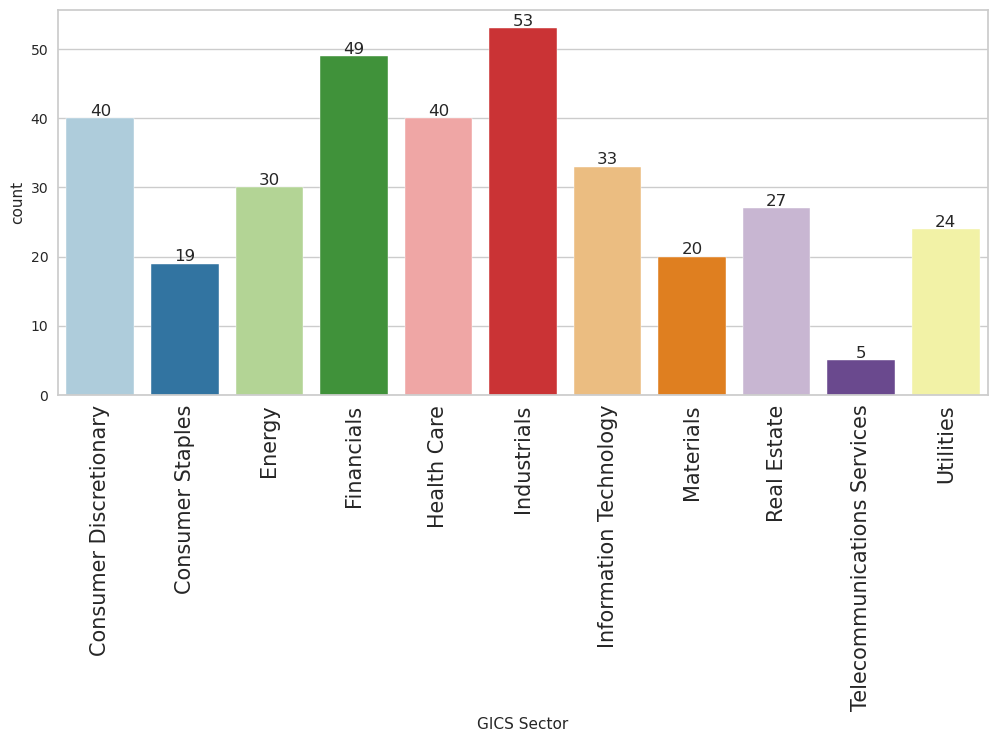

In [8]:
labeled_barplot(data,'GICS Sector')

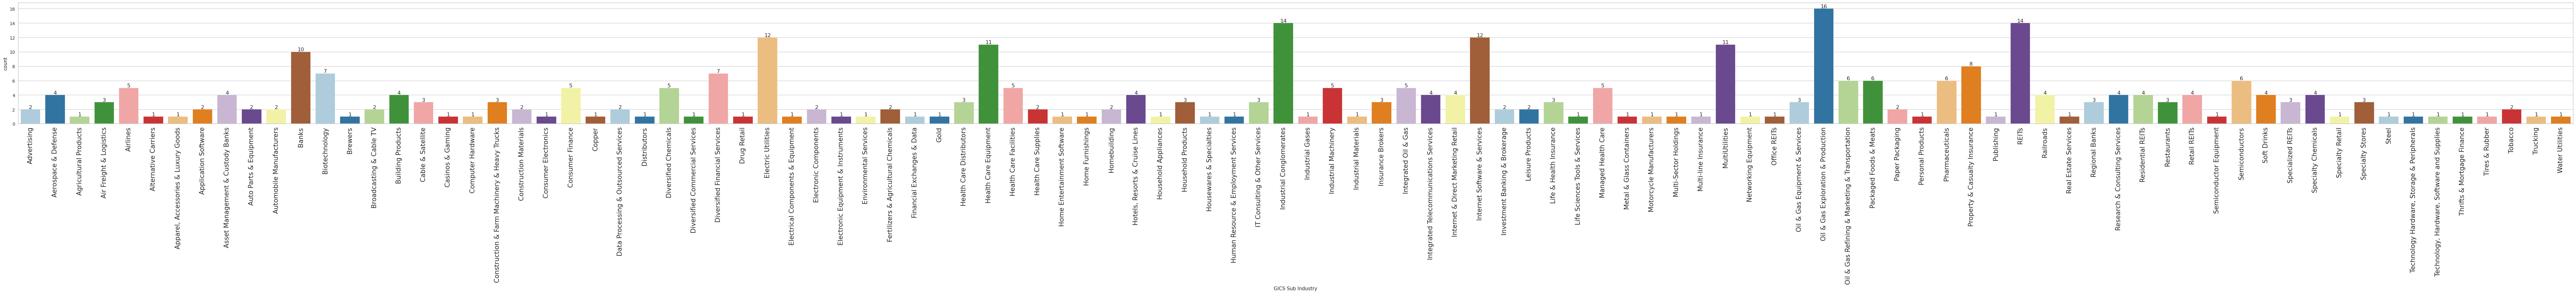

In [9]:
labeled_barplot(data,'GICS Sub Industry')

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
data.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


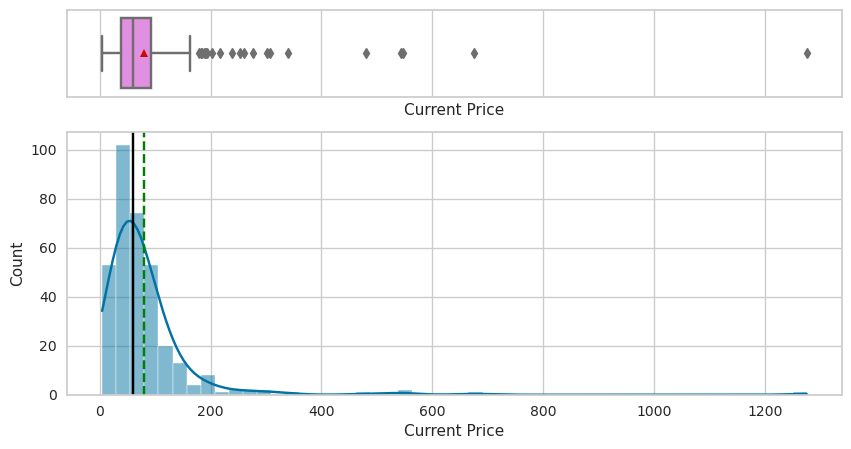

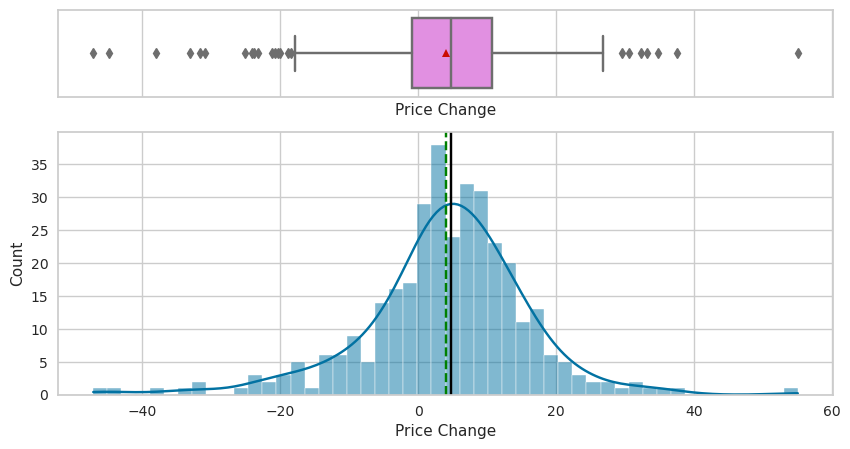

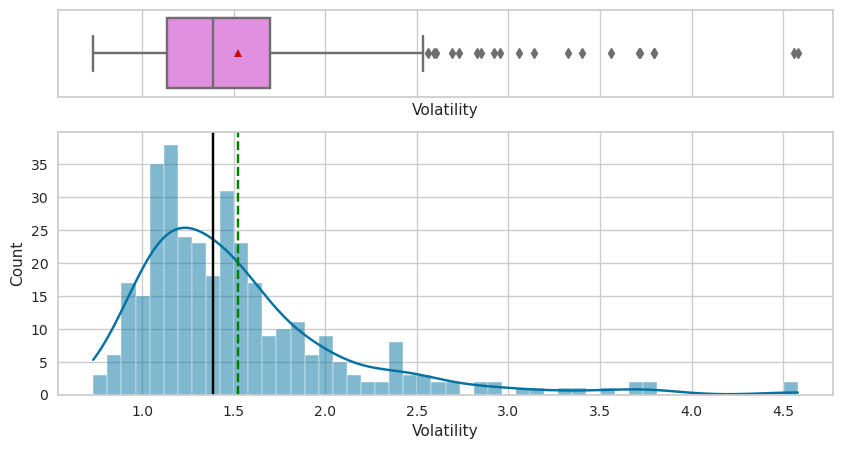

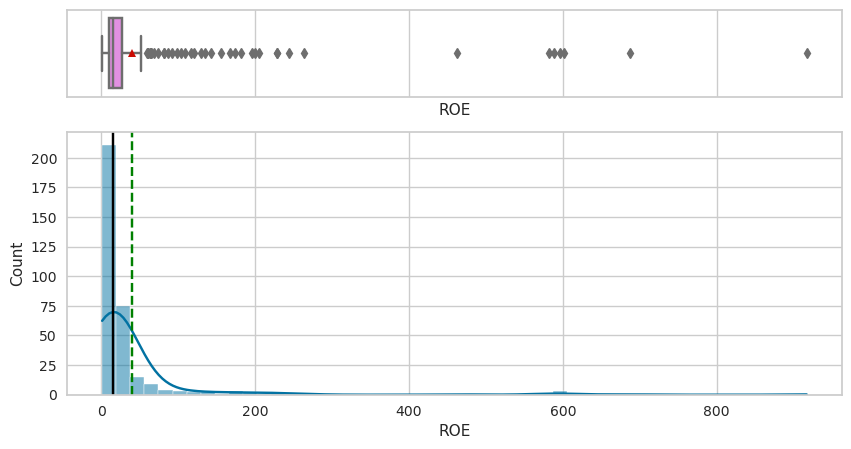

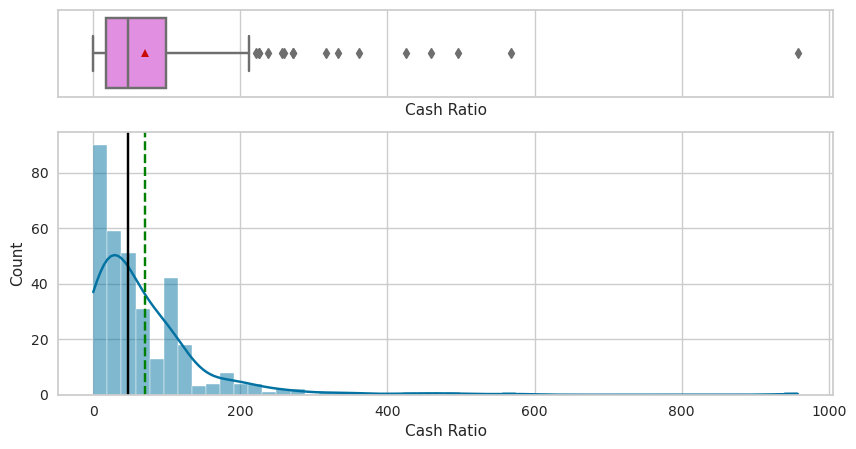

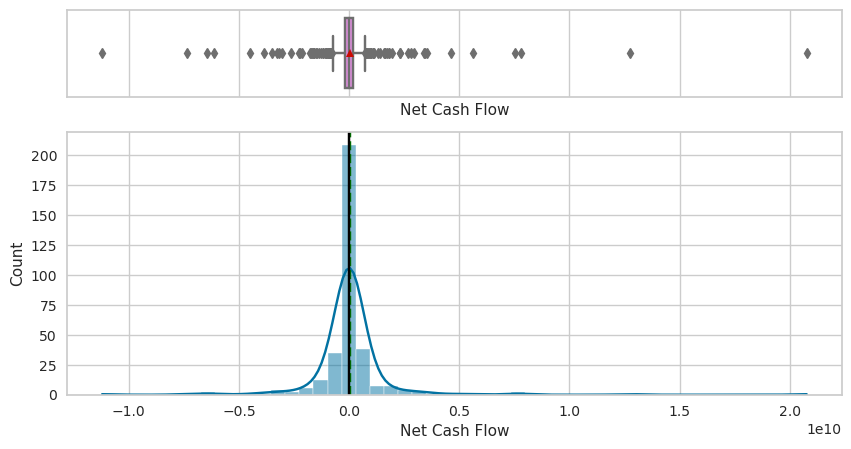

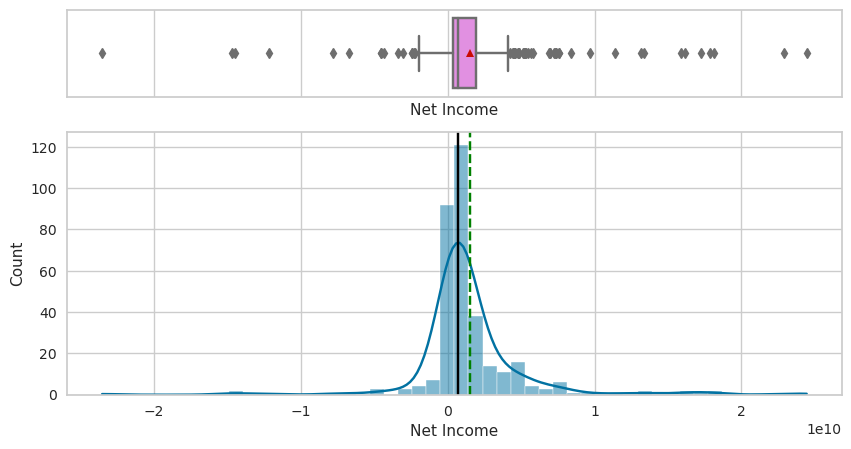

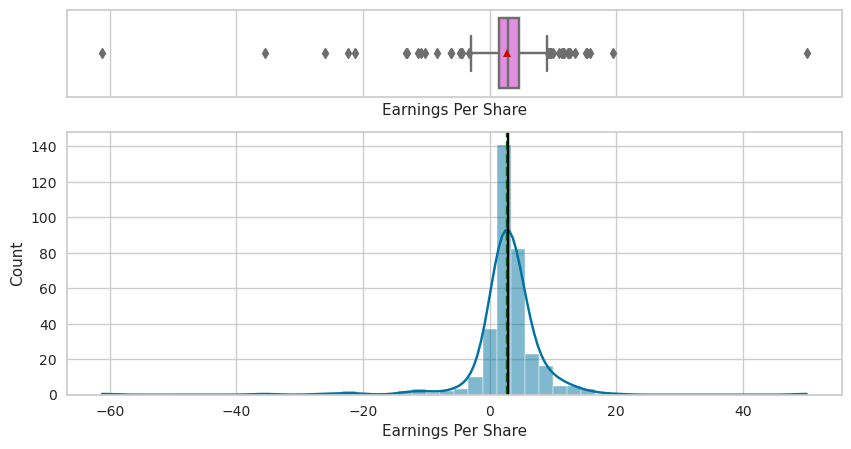

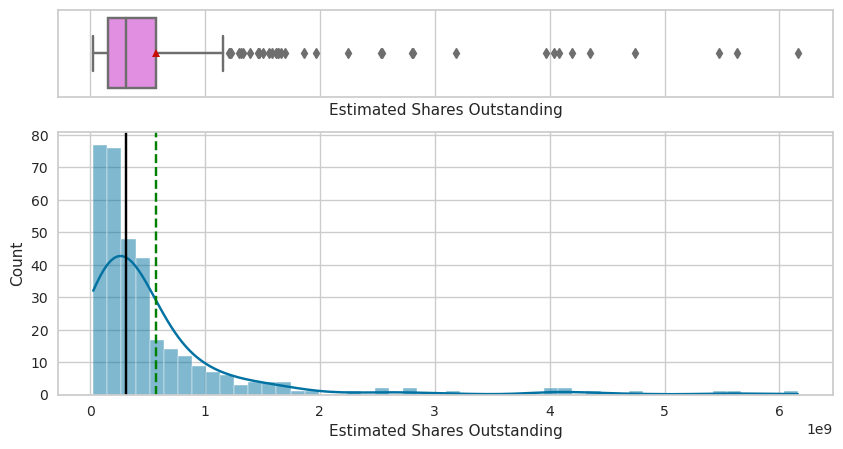

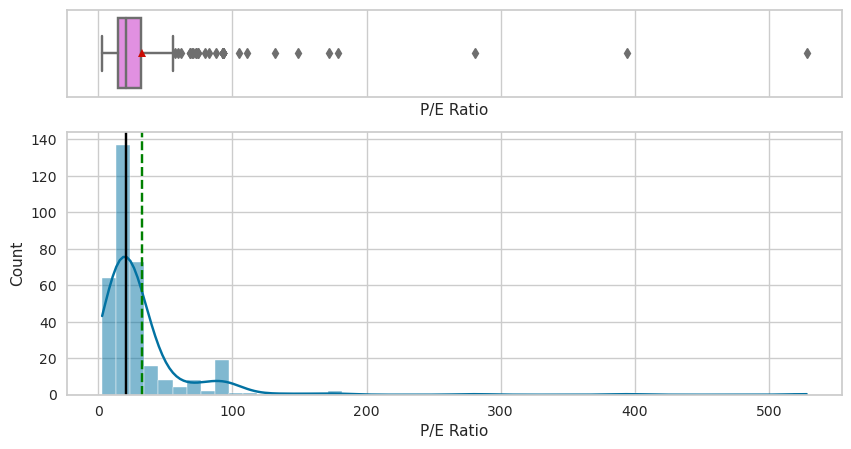

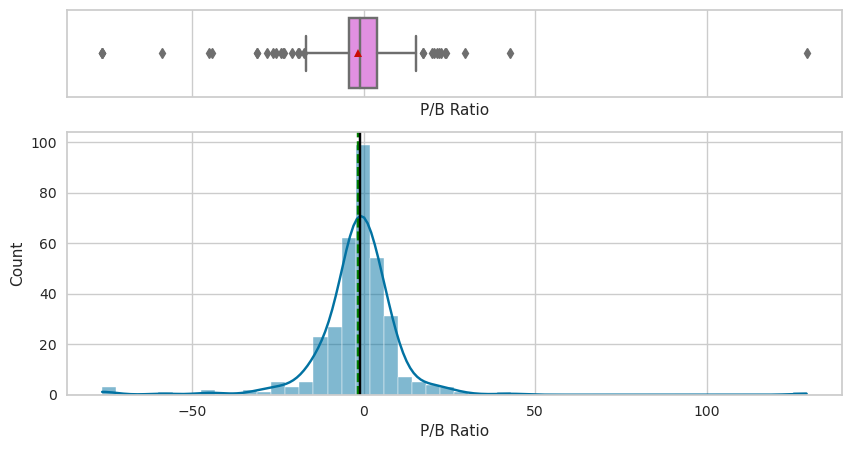

In [12]:
# columnas numericas
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

* Current Price, Volatility, ROE, Cash Ratio, Estimated Shares Outstanding, P/E Ratio presenta una dsistribución exponencial
* Price Change, Net Cash Flow, Net Income, Earnings Per Share, P/B Ratio presenta una distribución gauseana

In [13]:
# Tratamiento de valores numéricos, logaritmicos
data["Current Price"] = np.log(data["Current Price"])
data["Volatility"] = np.log(data["Volatility"])
data["ROE"] = np.log(data["ROE"])
data["Cash Ratio"] = np.log(data["Cash Ratio"]+1)
data["Estimated Shares Outstanding"] = np.log(data["Estimated Shares Outstanding"])
data["P/E Ratio"] = np.log(data["P/E Ratio"])

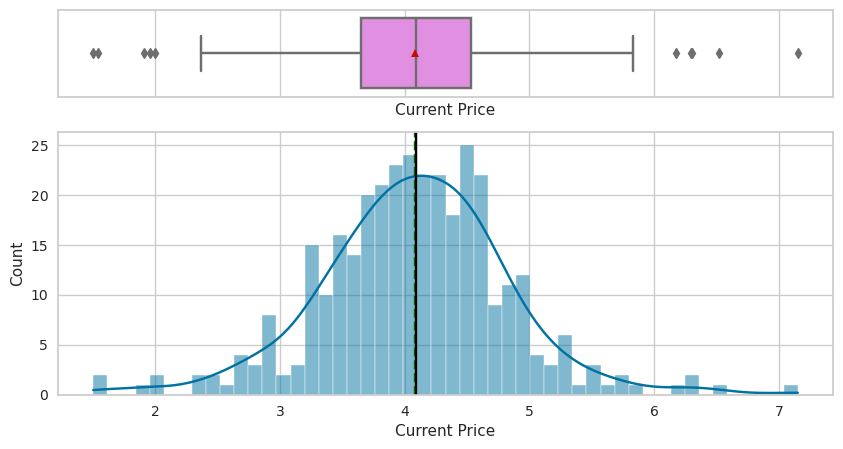

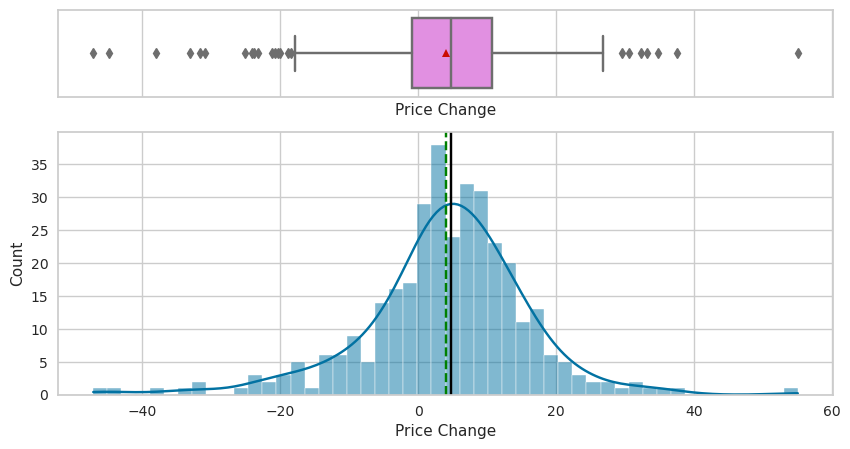

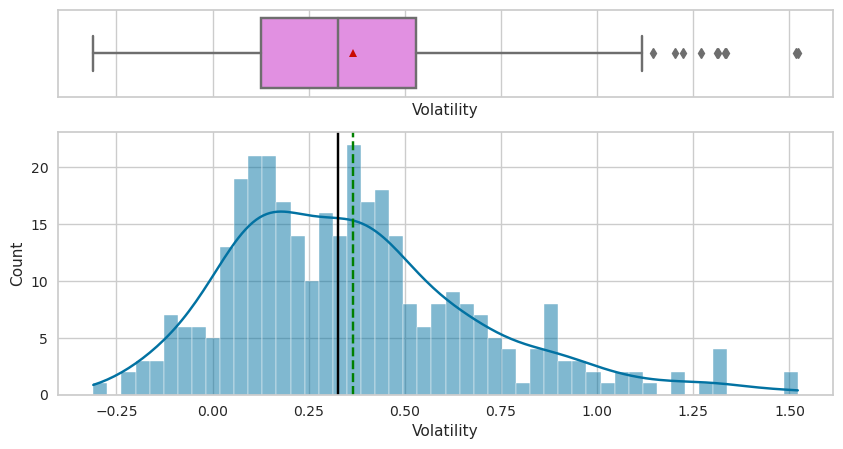

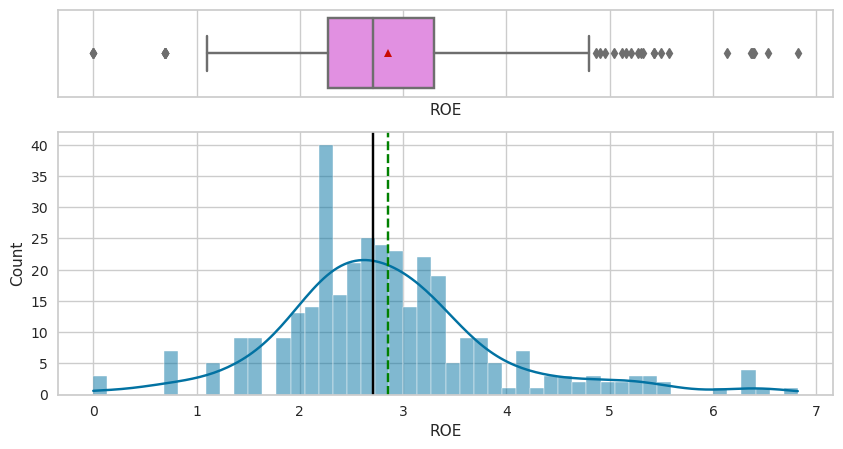

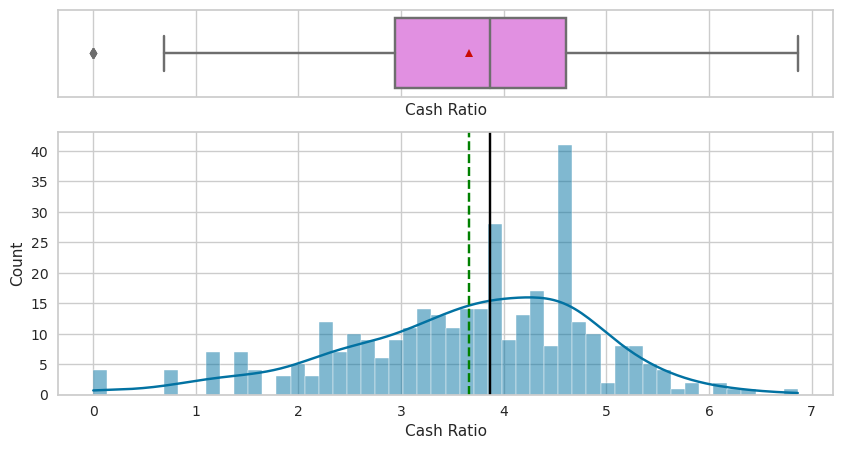

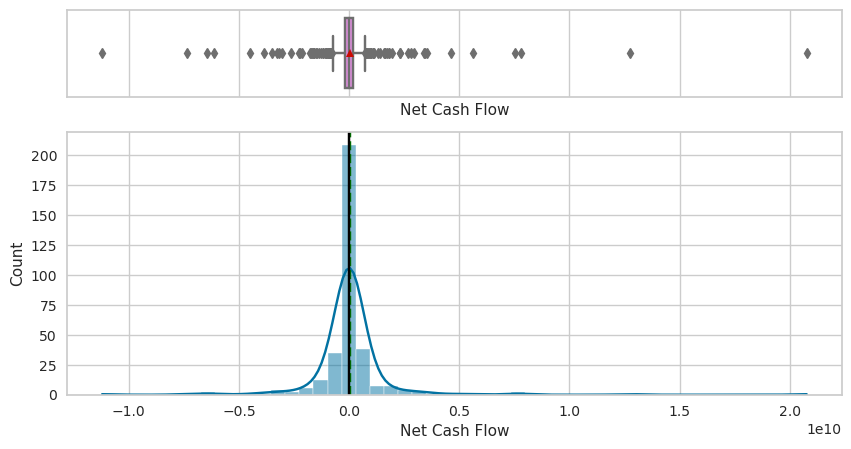

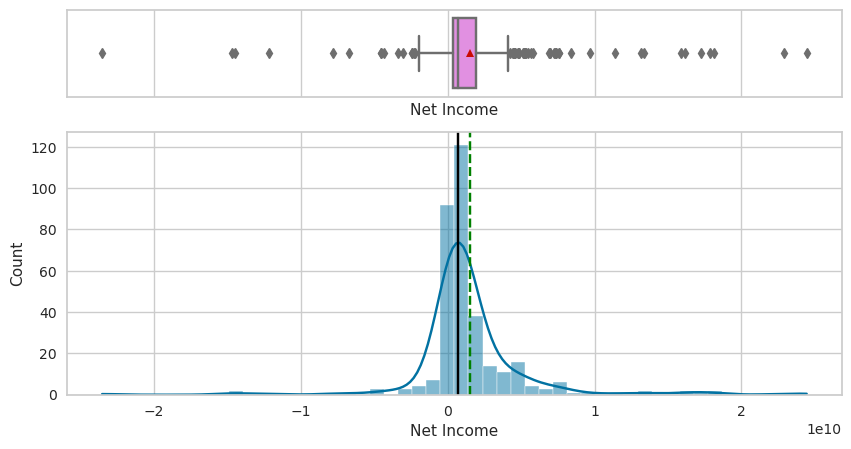

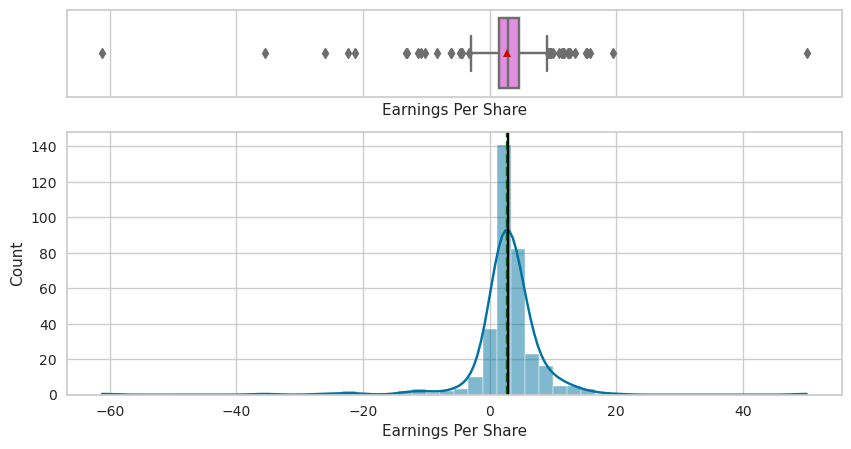

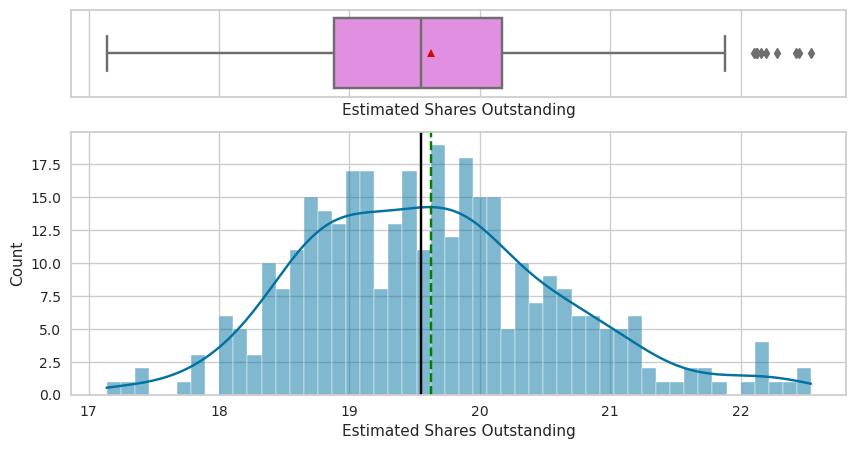

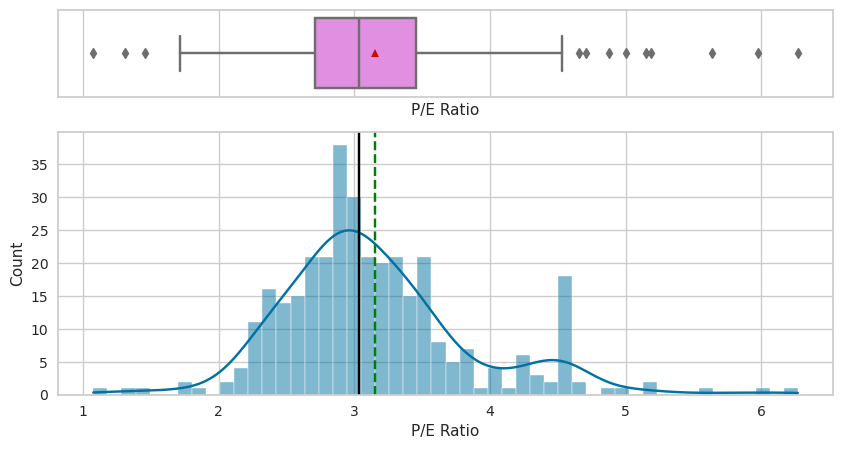

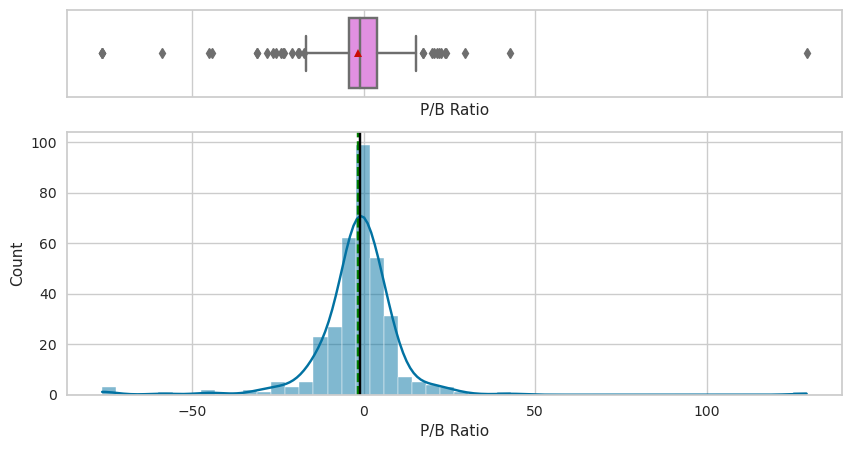

In [14]:
# columnas numericas
num_cols = data.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(data, item, bins=50, kde=True, figsize=(10, 5))

**Observaciones** 
* la mejora sobre los valores atipicos con cola a la derecha ya fue realizada con lo que nos ayudará para mejorar la precisión al momento de elaborar los clusters

---

**Preguntas**:

1. ¿Cómo es la distribución de los precios de las acciones?
2. ¿Las acciones de qué sector económico han visto el máximo aumento de precio en promedio?
3. ¿Cómo se correlacionan las diferentes variables entre sí?
4. El índice de efectivo proporciona una medida de la capacidad de una empresa para cubrir sus obligaciones a corto plazo utilizando solo efectivo y equivalentes de efectivo. ¿Cómo varía la razón de efectivo promedio entre los sectores económicos?
5. Las relaciones P/E pueden ayudar a determinar el valor relativo de las acciones de una empresa, ya que representan la cantidad de dinero que un inversionista está dispuesto a invertir en una sola acción de una empresa por cada dólar de sus ganancias. ¿Cómo varía la relación P/E, en promedio, entre sectores económicos?

In [15]:
df = data.copy()

### 1. ¿Cómo es la distribución de los precios de las acciones?

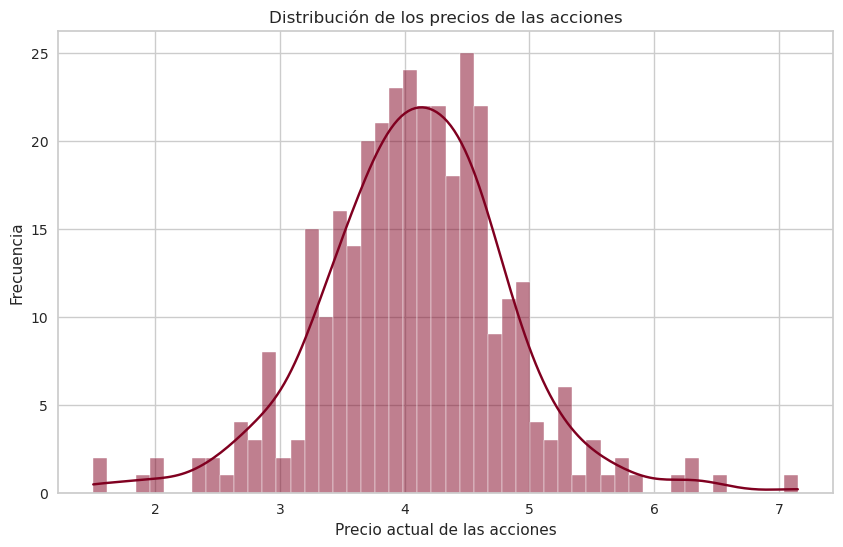

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['Current Price'], kde=True, bins=50, color='#800020')
plt.title('Distribución de los precios de las acciones')
plt.xlabel('Precio actual de las acciones')
plt.ylabel('Frecuencia')
plt.show()

* La mayoria de los precios se encuentra entre los 100 y 150

### 2. ¿Las acciones de qué sector económico han visto el máximo aumento de precio en promedio?

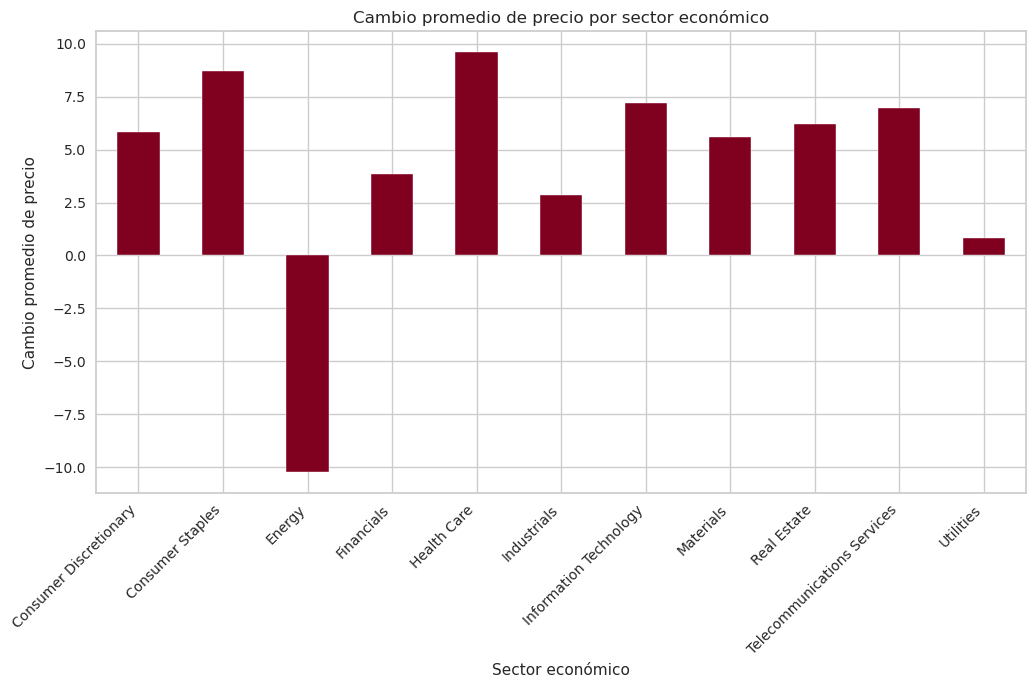

In [17]:

# Crear un gráfico de barras

avg_price_change_by_sector = df.groupby('GICS Sector')['Price Change'].mean()
avg_price_change_by_sector.plot(kind='bar', figsize=(12, 6), color='#800020')

# Personalizar el gráfico
plt.title('Cambio promedio de precio por sector económico')
plt.xlabel('Sector económico')
plt.ylabel('Cambio promedio de precio')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor visualización

# Mostrar el gráfico
plt.show()

* La mayoria de los sectores a experimentado un crecimiento economico pero podriamos resaltar mas al setor **Information Technology**
* Podriamos mencionar tambien que el sector **Energy** A experimentado un bajón economico

### 3. ¿Cómo se correlacionan las diferentes variables entre sí?

<AxesSubplot:>

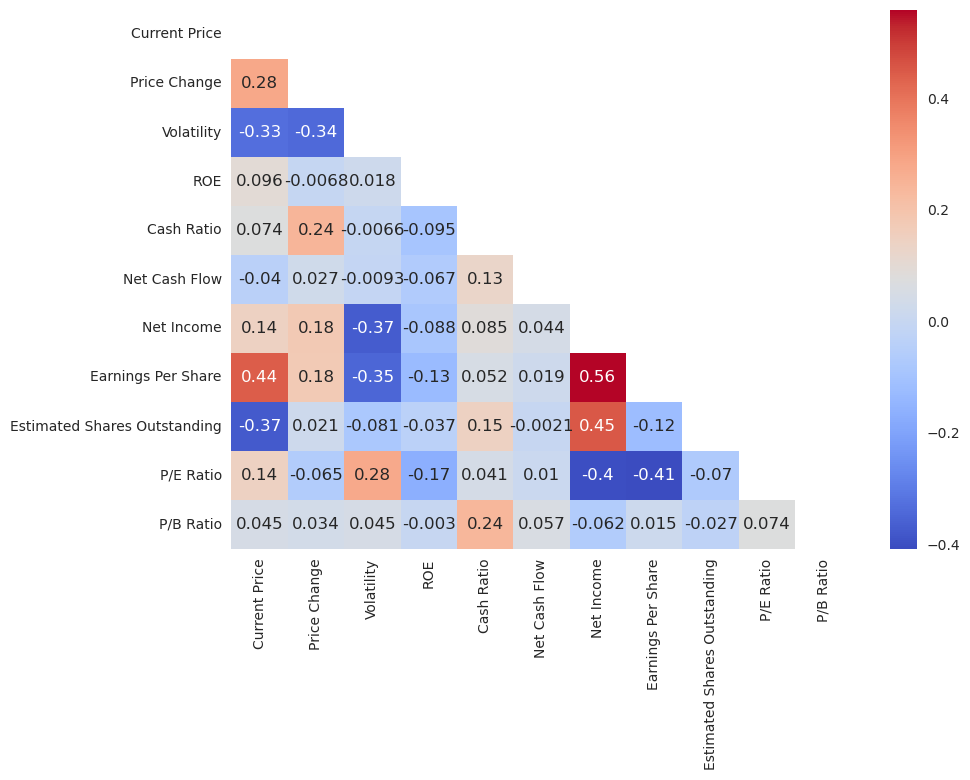

In [18]:

# Visualización de un headmap
plt.figure(figsize= (10,7))
correlaciones = df[num_cols].corr()
upp_mat = np.triu(correlaciones)        #upp_mat, crea una matriz triangular superior a la matriz dada
sns.heatmap(correlaciones, annot = True, cmap = 'coolwarm', mask = upp_mat) 

* Vemos una buena correlación entre la variable **Net Income** con las variables **Estimated Shares Outstanding**, **Earnings Per Share**
* como tambien notamos una buena correlación entre las variables **Current Price** con la variable **Earnings Per Share**

###  4. El índice de efectivo proporciona una medida de la capacidad de una empresa para cubrir sus obligaciones a corto plazo utilizando solo efectivo y equivalentes de efectivo.  ¿Cómo varía la razón de efectivo promedio entre los sectores económicos?

In [19]:
cash_ratio_avg_by_sector = df.groupby('GICS Sector')['Cash Ratio'].mean()
cash_ratio_avg_by_sector = cash_ratio_avg_by_sector.sort_values(ascending=False)
print(cash_ratio_avg_by_sector)

GICS Sector
Financials                     4.585626
Information Technology         4.556899
Health Care                    4.133525
Real Estate                    3.830964
Consumer Staples               3.643136
Telecommunications Services    3.382995
Industrials                    3.276749
Energy                         3.217658
Materials                      3.199183
Consumer Discretionary         3.193674
Utilities                      2.174329
Name: Cash Ratio, dtype: float64


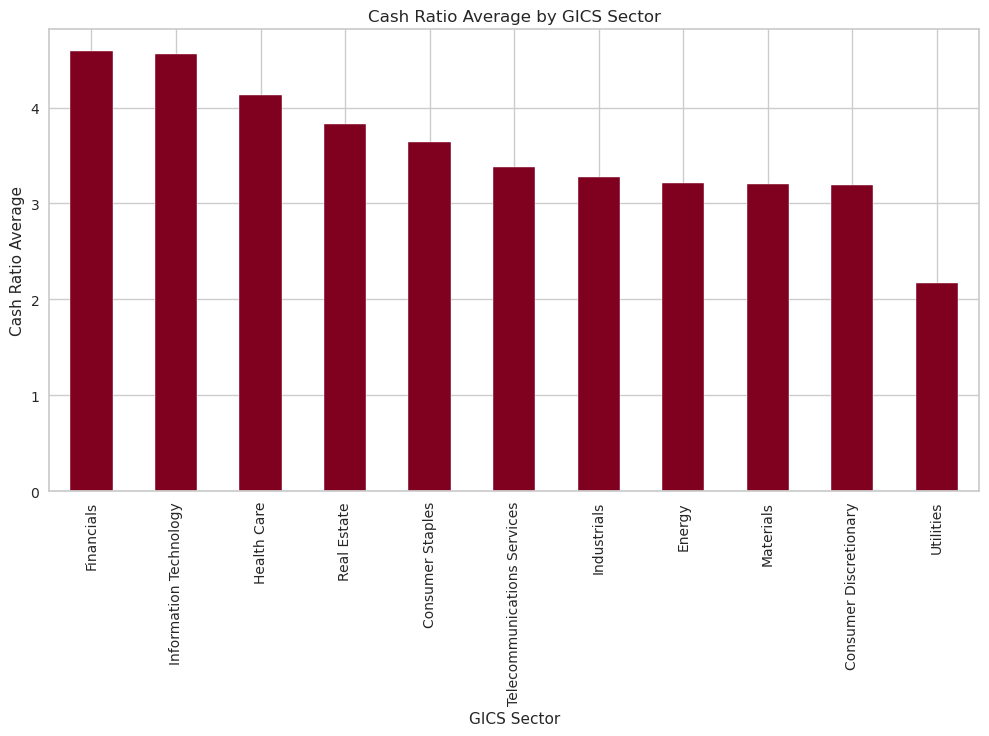

In [20]:
# Crear un gráfico de barras
cash_ratio_avg_by_sector.plot(kind='bar', figsize=(12, 6), color='#800020')

# Poner etiquetas y título
plt.ylabel('Cash Ratio Average')
plt.title('Cash Ratio Average by GICS Sector')

# Mostrar el gráfico
plt.show()

* La razón de efectivo promedio varia ocupando el ultimo lugar el sector **Utilities** y como primer lugar al sector **Information Technology**

### 5. Las relaciones P/E pueden ayudar a determinar el valor relativo de las acciones de una empresa, ya que representan la cantidad de dinero que un inversionista está dispuesto a invertir en una sola acción de una empresa por cada dólar de sus ganancias. ¿Cómo varía la relación P/E, en promedio, entre sectores económicos?

In [21]:
# Agrupar por 'GICS Sector' y calcular la media del 'P/E Ratio'
pe_ratio_avg_by_sector = df.groupby('GICS Sector')['P/E Ratio'].mean()

# Ordenar los resultados
pe_ratio_avg_by_sector = pe_ratio_avg_by_sector.sort_values(ascending=False)

# Imprimir los resultados
print(pe_ratio_avg_by_sector)

GICS Sector
Energy                         4.009261
Real Estate                    3.643172
Health Care                    3.413976
Information Technology         3.344648
Consumer Staples               3.164807
Materials                      3.081592
Consumer Discretionary         3.080694
Utilities                      2.894900
Industrials                    2.810751
Financials                     2.685075
Telecommunications Services    2.439516
Name: P/E Ratio, dtype: float64


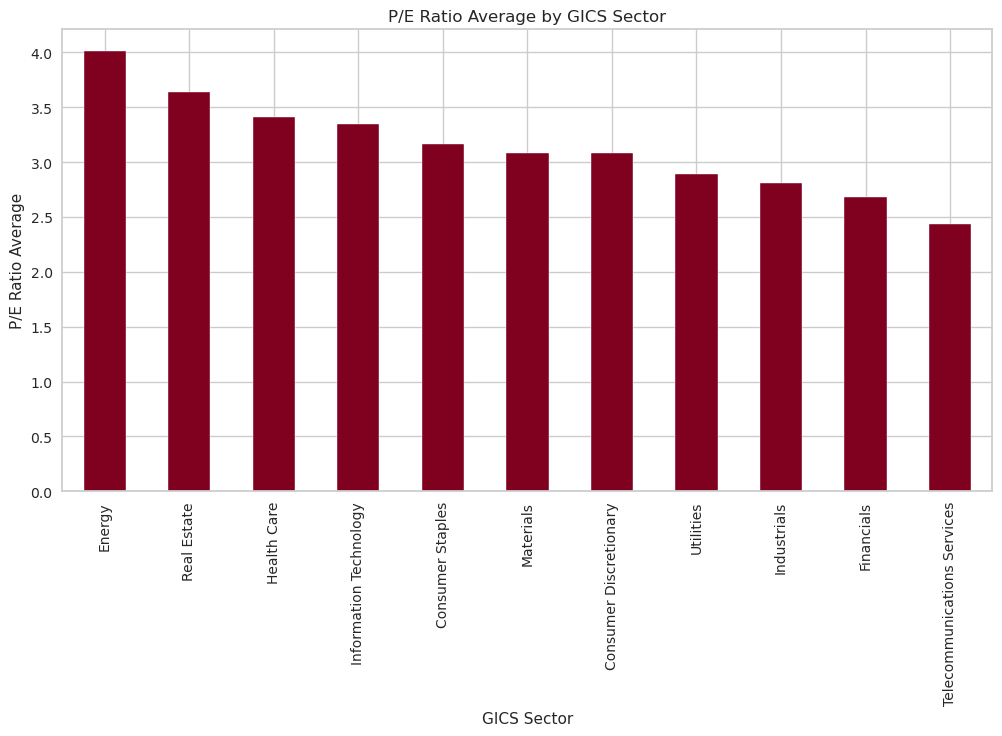

In [22]:
# Crear un gráfico de barras
pe_ratio_avg_by_sector.plot(kind='bar', figsize=(12, 6), color='#800020')

# Poner etiquetas y título
plt.ylabel('P/E Ratio Average')
plt.title('P/E Ratio Average by GICS Sector')

# Mostrar el gráfico
plt.show()

* A diferencia del anterior, aqui la relación P/E tiene a la cabeza al sector **Energy** y como ultimo sector a **Telecomunications Services**

---

## Preprocesamiento de datos

- Comprobación de valores duplicados
- Tratamiento de valores perdidos
- Comprobación de valores atípicos
- Ingeniería de características (si es necesario)
- Cualquier otro paso de preprocesamiento (si es necesario)

#### Comprobación de valores faltantes

In [23]:
df.isnull().sum()

GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* No hay valores faltantes

#### variables categóricas

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['GICS Sector', 'GICS Sub Industry']:
    df[col] = le.fit_transform(df[col])
    
df.head()

,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,5,4,3.745968,9.999995,0.523041,4.905275,3.951244,-604000000,7610000000,11.39,20.319993,1.313233,-8.784219
1,4,78,4.081597,8.339433,0.787497,4.867534,4.356709,51000000,5144000000,3.15,21.213694,2.934195,-8.750068
2,4,39,3.804660,11.301121,0.241884,3.044522,4.219508,938000000,4423000000,2.94,21.131674,2.726251,-0.394171
3,6,7,4.542656,13.977195,0.305777,2.197225,5.198497,-240840000,629551000,1.26,20.029406,4.311545,4.199651
4,6,90,4.013135,-1.827858,0.531316,2.639057,5.609472,315120000,696878000,0.31,21.533304,5.184317,1.059810


In [25]:
df.shape

(340, 13)

#### Escalamos la data

In [26]:
#Escalamos la data
from sklearn.preprocessing import scale
X_scaled = scale(df)
X_scaled

array([[ 2.18520125e-01, -1.73427582e+00, -4.44298631e-01, ...,
         7.09632820e-01, -2.60211136e+00, -5.06653460e-01],
       [-1.35274363e-01,  9.09591099e-01,  3.54672351e-04, ...,
         1.61852402e+00, -3.12255623e-01, -5.04204691e-01],
       [-1.35274363e-01, -4.83798223e-01, -3.66541139e-01, ...,
         1.53511003e+00, -6.06007729e-01,  9.49407775e-02],
       ...,
       [-1.35274363e-01, -4.83798223e-01,  7.27880250e-01, ...,
        -5.77466868e-01,  2.43536338e+00, -1.58938994e+00],
       [-4.89068850e-01,  1.12395869e+00, -1.02601039e+00, ...,
        -2.58486955e-01, -4.33282353e-02,  1.18679975e-01],
       [-1.35274363e-01,  9.09591099e-01, -2.80595740e-01, ...,
         4.11835730e-01,  1.55385929e+00,  2.46753843e-01]])

In [27]:
df_scaled = pd.DataFrame(data=X_scaled, index = df.index, columns = df.columns )
df_scaled.head(5)

,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,0.218520,-1.734276,-0.444299,0.493950,0.488526,1.904890,0.241027,-0.339355,1.554415,1.309399,0.709633,-2.602111,-0.506653
1,-0.135274,0.909591,0.000355,0.355439,1.303910,1.869903,0.575558,-0.002335,0.927628,0.056755,1.618524,-0.312256,-0.504205
2,-0.135274,-0.483798,-0.366541,0.602479,-0.378356,0.179868,0.462360,0.454058,0.744371,0.024831,1.535110,-0.606008,0.094941
3,0.572315,-1.627092,0.611183,0.825696,-0.181358,-0.605625,1.270078,-0.152497,-0.219816,-0.230563,0.414106,1.633461,0.424333
4,0.572315,1.338326,-0.090347,-0.492636,0.514037,-0.196021,1.609155,0.133564,-0.202703,-0.374982,1.943566,2.866386,0.199196


## Agrupación de medios K

In [28]:
# Con el fin de mo alterar el dataframe original durante el procesamiento y modelado
k_means_df = df_scaled.copy()

### Diagrama del codo

In [29]:
# METODO 1 (inertia)
from sklearn.cluster import KMeans
cs = []
Nc = range(1,11)
for i in Nc:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 20, random_state = 22)
    kmeans.fit(k_means_df)
    print("Número de cluster:", i, "\tinercia:", kmeans.inertia_)
    
    # guardamos la inercia,la suma de las distancias al cuadrado de cada muestra a su centroide más cercano
    cs.append(kmeans.inertia_) 

Número de cluster: 1 	inercia: 4420.0
Número de cluster: 2 	inercia: 3923.637229096267
Número de cluster: 3 	inercia: 3588.652299923584
Número de cluster: 4 	inercia: 3337.765039270267
Número de cluster: 5 	inercia: 3136.959058895721
Número de cluster: 6 	inercia: 2983.5274666717673
Número de cluster: 7 	inercia: 2827.65335986825
Número de cluster: 8 	inercia: 2702.7359519390234
Número de cluster: 9 	inercia: 2538.619378464882
Número de cluster: 10 	inercia: 2456.568432018426


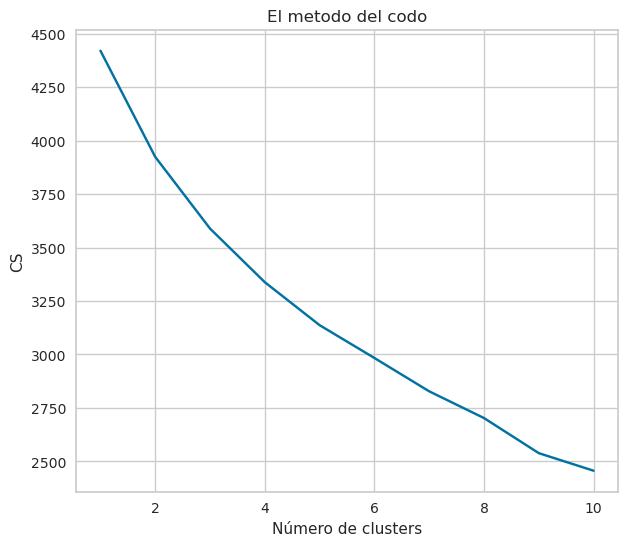

In [30]:
plt.figure(figsize = (7,6))
plt.plot(Nc, cs)
plt.title('El metodo del codo')
plt.xlabel('Número de clusters')
plt.ylabel('CS')
plt.show()

**Observación**
* Parece que el codo podría estar alrededor de 3 o 4 clusters, ya que ahí es donde la disminución en la inercia comienza a ser menos pronunciada. Pero la elección exacta puede ser subjetiva y también debería basarse en el conocimiento del dominio y en lo que tiene sentido para tu aplicación particular.

Número de cluster: 1 	Distorción promedio: 3.268738626533877
Número de cluster: 2 	Distorción promedio: 3.115845630411696
Número de cluster: 3 	Distorción promedio: 2.9736863320492284
Número de cluster: 4 	Distorción promedio: 2.83583895970935
Número de cluster: 5 	Distorción promedio: 2.7699991209435626
Número de cluster: 6 	Distorción promedio: 2.7126739954561976
Número de cluster: 7 	Distorción promedio: 2.6548689773249876
Número de cluster: 8 	Distorción promedio: 2.6013011382536653
Número de cluster: 9 	Distorción promedio: 2.5530574114217988
Número de cluster: 10 	Distorción promedio: 2.516581804146576
Número de cluster: 11 	Distorción promedio: 2.47305079766881
Número de cluster: 12 	Distorción promedio: 2.442127476730444


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


Número de cluster: 13 	Distorción promedio: 2.4054052874098137
Número de cluster: 14 	Distorción promedio: 2.3379064047991873


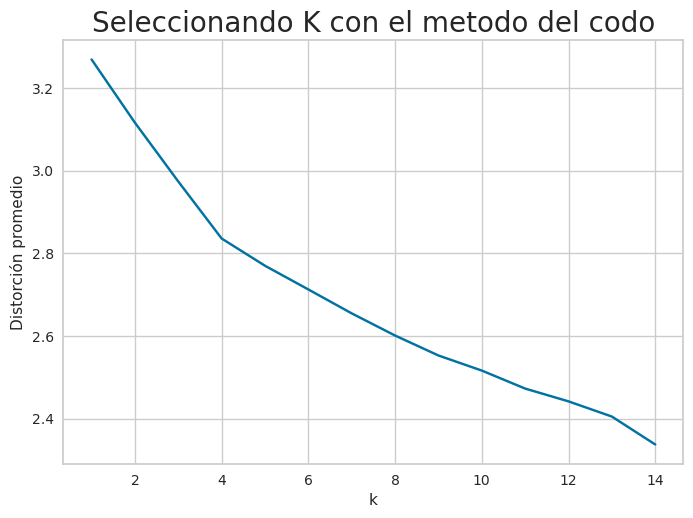

In [31]:
# metodo 2, (distorción)
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_means_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Número de cluster:", k, "\tDistorción promedio:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distorción promedio")
plt.title("Seleccionando K con el metodo del codo", fontsize=20)
plt.show()

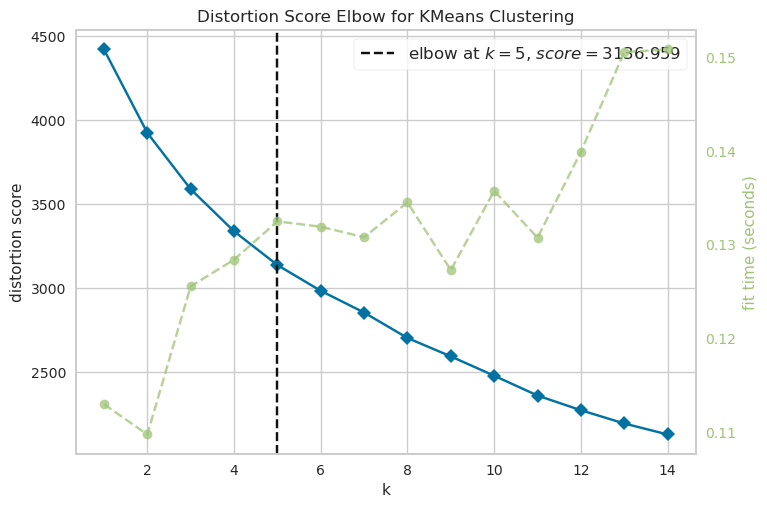

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# metodo 3, libreria KElbowVisualizer
model = KMeans(random_state=22)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  
visualizer.show()  

**Observacion**
* Vemos que segun la libreria KElbowVisualizer, nos da un valor optimo de 5 clusters, sin embargo a simple vista no vemos mucha distancia con el cluster 4 y el cluster 5, de todas maneras se probará por los puntajes de la silueta


### Veamos las puntuaciones de las siluetas

Para el n_clusters = 2, la puntuación de la silueta es 0.2999407289307567)
Para el n_clusters = 3, la puntuación de la silueta es 0.10501586678191879)
Para el n_clusters = 4, la puntuación de la silueta es 0.08741524754817262)
Para el n_clusters = 5, la puntuación de la silueta es 0.09508723757646795)
Para el n_clusters = 6, la puntuación de la silueta es 0.10658097159208424)
Para el n_clusters = 7, la puntuación de la silueta es 0.0924289542264219)
Para el n_clusters = 8, la puntuación de la silueta es 0.10702367991425922)
Para el n_clusters = 9, la puntuación de la silueta es 0.11636549275071023)
Para el n_clusters = 10, la puntuación de la silueta es 0.1091122054696954)
Para el n_clusters = 11, la puntuación de la silueta es 0.1185259239522774)
Para el n_clusters = 12, la puntuación de la silueta es 0.10527807696187816)
Para el n_clusters = 13, la puntuación de la silueta es 0.11029371717842316)
Para el n_clusters = 14, la puntuación de la silueta es 0.11660718903146648)


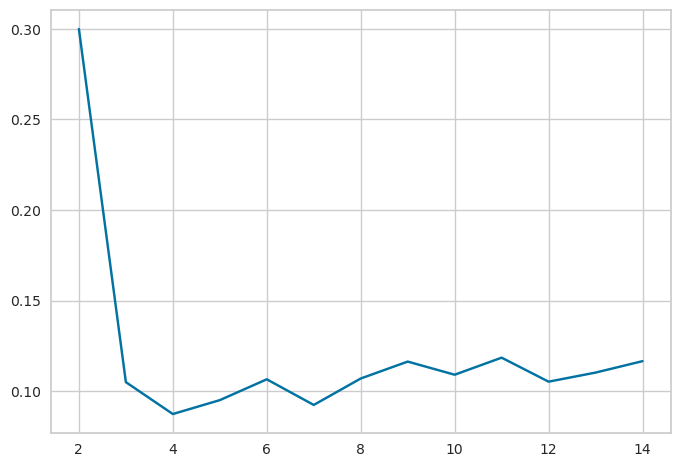

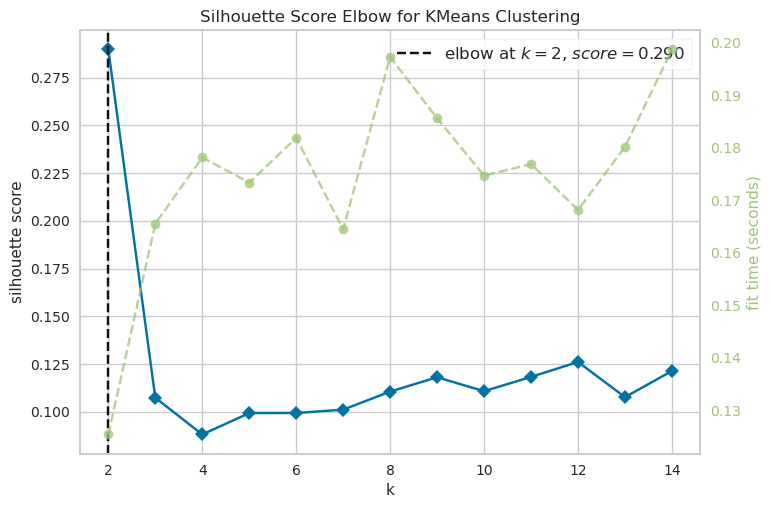

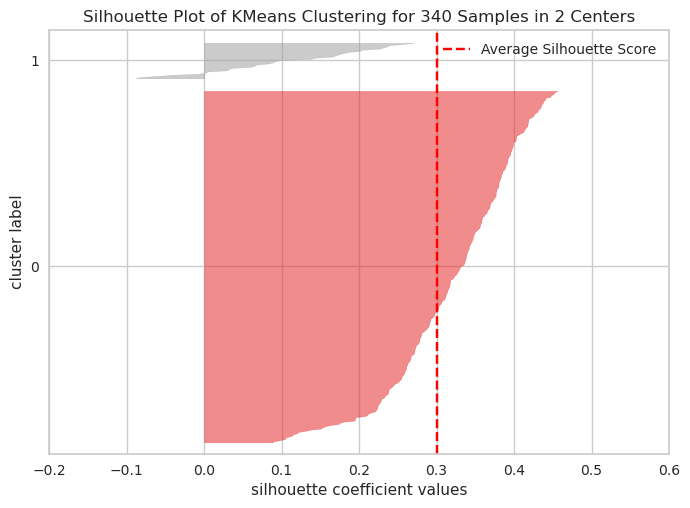

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# Lista para almacenar los puntajes de silueta
# Mide cuán cerca están los puntos en el mismo cluster y cuán lejos están los puntos en diferentes clusters
sil_score = []

cluster_list = range(2, 15)

for n_clusters in cluster_list:

    clusterer = KMeans(n_clusters=n_clusters, random_state=22)
    preds = clusterer.fit_predict((k_means_df))
    score = silhouette_score(k_means_df, preds)

    # Agregamos la puntuación de la silueta a nuestra lista
    sil_score.append(score)
    print("Para el n_clusters = {}, la puntuación de la silueta es {})".format(n_clusters, score))

# Graficamos las puntuaciones de la silueta en función del número de clusters
plt.plot(cluster_list, sil_score)
plt.show()

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  
visualizer.show()  

# Creamos un visualizador de silueta para el número óptimo de clusters
visualizer = SilhouetteVisualizer(KMeans(n_clusters=visualizer.elbow_value_, random_state=22))
visualizer.fit(k_means_df)
visualizer.show()

**Observaciones**
* La puntuación de la silueta varía entre -1 y +1, donde un valor alto indica que la muestra está bien emparejada con su propio cluster y mal emparejada con los clusters vecinos. Si la mayoría de los objetos tienen un valor alto, entonces la configuración de clustering es apropiada. Si muchos puntos tienen un valor bajo o negativo, entonces la configuración de clustering puede tener demasiados o muy pocos clusters.

* Por tanto, el valor de "n_clusters" que nos da la mayor puntuación de silueta es el que indica el número óptimo de clusters. Según los resultados que obtuviste, la mayor puntuación de la silueta se obtuvo para n_clusters = 2 (puntuación de la silueta de 0.2999407289). Por lo tanto, en este caso, podríamos decir que el número óptimo de clusters es 2.

* De igual manera los graficos nos muestran tambien que segun la puntuación de la silueta un posible numero de cluster seria de **2**, pero teniendo en cuenta las anteriores pruebas de la inercia y la distorción no consideramos que 2 sea el número más optimo, pero podría ser una opción en caso de que la empresa maneje un bajo presupuesto.

### Creación del modelo final

In [192]:
import time
start_time = time.time()

kmeans = KMeans(n_clusters=4, random_state=100)  ## escogemos 4 cluster como valor optimo
kmeans.fit(k_means_df)

end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")


# añadiendo los resultados del kmeans al dataframe original
k_means_df["KM_segments"] = kmeans.labels_
data["KM_segments"] = kmeans.labels_

Tiempo de ejecución: 0.1126556396484375 segundos


In [193]:
data.head()

,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,KM_segments,HC_segments
0,Industrials,Airlines,3.745968,9.999995,0.523041,4.905275,3.951244,-604000000,7610000000,11.39,20.319993,1.313233,-8.784219,2,0
1,Health Care,Pharmaceuticals,4.081597,8.339433,0.787497,4.867534,4.356709,51000000,5144000000,3.15,21.213694,2.934195,-8.750068,2,0
2,Health Care,Health Care Equipment,3.804660,11.301121,0.241884,3.044522,4.219508,938000000,4423000000,2.94,21.131674,2.726251,-0.394171,2,0
3,Information Technology,Application Software,4.542656,13.977195,0.305777,2.197225,5.198497,-240840000,629551000,1.26,20.029406,4.311545,4.199651,1,0
4,Information Technology,Semiconductors,4.013135,-1.827858,0.531316,2.639057,5.609472,315120000,696878000,0.31,21.533304,5.184317,1.059810,3,0


### Caracteristicas de los cluster

In [195]:
data["KM_segments"].value_counts()

1    128
2    103
0     79
3     30
Name: KM_segments, dtype: int64

In [196]:
data.groupby("KM_segments").mean()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_segments
KM_segments,,,,,,,,,,,,
0,4.021020,2.357309,0.199823,2.447659,2.920899,-5.332753e+07,7.481522e+08,2.605000,19.360867,3.181874,-4.211303,1.341772
1,4.456020,7.266744,0.363450,3.073918,3.743427,4.211177e+07,7.593450e+08,4.506719,18.933322,3.191771,-2.184878,0.179688
2,3.865165,6.815942,0.307866,2.810651,4.228065,1.350564e+08,4.432331e+09,4.052330,20.624192,2.754998,-0.232122,0.252427
3,3.383628,-14.394229,0.998170,3.094897,3.289881,1.264850e+08,-3.491316e+09,-8.532667,19.809647,4.303361,1.735369,0.833333


**Observaciones**
* Current Price se encuentra más en el cluster 1
* Price Change se encuentra más en el cluster 2
* En cuanto a los que tienen mejor rendimiento financiero ROE se encuentran en el cluster 4

* Hago esta comparativa para poder identificar a que grupo debemos centrarnos más segun ciertas caracteristicas

In [197]:
pd.crosstab(data['KM_segments'], data['GICS Sector'])

GICS Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
KM_segments,,,,,,,,,,,
0,0,0,0,2,0,12,4,10,26,1,24
1,34,11,1,16,28,24,8,5,1,0,0
2,6,8,5,31,12,16,17,4,0,4,0
3,0,0,24,0,0,1,4,1,0,0,0


* Podemos identificar que segun la variable GICS Sector:
* Consumer Discretionary -> 1
* Consumer Staples -> 2
* Energy -> 4
* Financials -> 2
* Health Care -> 1
* Industrials  -> 1
* Information Technology -> 2

In [198]:
pd.crosstab(data['KM_segments'], data['GICS Sub Industry'])

GICS Sub Industry,Advertising,Aerospace & Defense,Agricultural Products,Air Freight & Logistics,Airlines,Alternative Carriers,"Apparel, Accessories & Luxury Goods",Application Software,Asset Management & Custody Banks,Auto Parts & Equipment,Automobile Manufacturers,Banks,Biotechnology,Brewers,Broadcasting & Cable TV,Building Products,Cable & Satellite,Casinos & Gaming,Computer Hardware,Construction & Farm Machinery & Heavy Trucks,Construction Materials,Consumer Electronics,Consumer Finance,Copper,Data Processing & Outsourced Services,Distributors,Diversified Chemicals,Diversified Commercial Services,Diversified Financial Services,Drug Retail,Electric Utilities,Electrical Components & Equipment,Electronic Components,Electronic Equipment & Instruments,Environmental Services,Fertilizers & Agricultural Chemicals,Financial Exchanges & Data,Gold,Health Care Distributors,Health Care Equipment,Health Care Facilities,Health Care Supplies,Home Entertainment Software,Home Furnishings,Homebuilding,"Hotels, Resorts & Cruise Lines",Household Appliances,Household Products,Housewares & Specialties,Human Resource & Employment Services,IT Consulting & Other Services,Industrial Conglomerates,Industrial Gases,Industrial Machinery,Industrial Materials,Insurance Brokers,Integrated Oil & Gas,Integrated Telecommunications Services,Internet & Direct Marketing Retail,Internet Software & Services,Investment Banking & Brokerage,Leisure Products,Life & Health Insurance,Life Sciences Tools & Services,Managed Health Care,Metal & Glass Containers,Motorcycle Manufacturers,Multi-Sector Holdings,Multi-line Insurance,MultiUtilities,Networking Equipment,Office REITs,Oil & Gas Equipment & Services,Oil & Gas Exploration & Production,Oil & Gas Refining & Marketing & Transportation,Packaged Foods & Meats,Paper Packaging,Personal Products,Pharmaceuticals,Property & Casualty Insurance,Publishing,REITs,Railroads,Real Estate Services,Regional Banks,Research & Consulting Services,Residential REITs,Restaurants,Retail REITs,Semiconductor Equipment,Semiconductors,Soft Drinks,Specialized REITs,Specialty Chemicals,Specialty Retail,Specialty Stores,Steel,"Technology Hardware, Storage & Peripherals","Technology, Hardware, Software and Supplies",Thrifts & Mortgage Finance,Tires & Rubber,Tobacco,Trucking,Water Utilities
KM_segments,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,0,0,1,0,4,0,0,0,0,0,1,0,0,0,11,0,1,0,0,0,0,2,0,0,0,0,13,1,1,1,3,4,0,4,0,0,0,3,3,0,0,1,0,1,1,0,0,1,1
1,2,2,0,2,1,0,1,1,3,2,0,1,5,1,1,4,3,1,0,0,2,1,0,0,1,1,2,1,3,0,0,1,0,1,0,0,1,0,2,8,5,2,0,1,1,3,1,3,1,1,0,5,0,4,1,2,0,0,4,3,1,2,1,1,4,0,1,0,1,0,0,0,0,0,1,5,0,1,1,2,1,1,1,0,1,1,0,2,0,0,2,1,0,1,1,3,0,0,0,0,1,0,0,0
2,0,2,1,1,4,1,0,0,1,0,2,9,2,0,1,0,0,0,1,3,0,0,5,0,1,0,2,0,4,1,0,0,2,0,0,1,0,1,1,3,0,0,1,0,1,1,0,0,0,0,3,4,0,0,0,1,2,3,0,4,1,0,2,0,1,0,0,1,0,0,1,0,0,0,3,1,0,0,5,6,0,0,2,0,1,0,0,1,0,1,3,3,0,0,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,16,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


* No vemos mucha inclinación de los diversos sectores para la columna GICS Sub Industry, como para sacar conclusiones e indicar que pueda pertenecer a un cluster

## Cluster Jerarquico

In [199]:
hc_df = df_scaled.copy()

### Cálculo de la correlación cofenética

In [200]:
# lista de métricas de distancia
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'jaccard', 'chebyshev'] 

# lista de métodos de vinculación (metodo de enlace para decidir como será la agrupación)
linkage_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'ward']

high_cophenet_corr = 0  # almacenar la mayor relacón cofenetica
high_dm_lm = [0, 0]   # metricas de distancia con metodos de enlace

for dm in distance_metrics:
    for lm in linkage_methods:
        try:    # en caso de excepciones porque no todos los los pares de metricas y distancias son compatibles
            Z = linkage(hc_df, metric=dm, method=lm)  # agrupación jerarquica 
            c, coph_dists = cophenet(Z, pdist(hc_df))  #correlación y distancia cofenetica
            print(
                "La correlación cofenética para la distancia {} y vinculación {}  es {}.".format(
                    dm.capitalize(), lm, c
                )
            )
            if high_cophenet_corr < c:
                high_cophenet_corr = c
                high_dm_lm[0] = dm
                high_dm_lm[1] = lm
        except:
            continue
            
if high_dm_lm[0] == 0:
    print("No se encontró ninguna correlación cofenética.")
else: 
    # imprimiendo la combinación de métrica de distancia y método de enlace con la correlación cofenética más alta
    print('*'*100)
    print(
        "La correlación cofenética más alta es {}, que se obtiene con distancia {} y vinculación {} .".format(
            high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
        )
    )

La correlación cofenética para la distancia Euclidean y vinculación single  es 0.8402383757415184.
La correlación cofenética para la distancia Euclidean y vinculación complete  es 0.6788127660157011.
La correlación cofenética para la distancia Euclidean y vinculación average  es 0.8583873702457787.
La correlación cofenética para la distancia Euclidean y vinculación weighted  es 0.6865271508562096.
La correlación cofenética para la distancia Euclidean y vinculación centroid  es 0.8675821447749646.
La correlación cofenética para la distancia Euclidean y vinculación ward  es 0.4473533688192757.
La correlación cofenética para la distancia Cosine y vinculación single  es 0.0938582435737004.
La correlación cofenética para la distancia Cosine y vinculación complete  es 0.17518412059956678.
La correlación cofenética para la distancia Cosine y vinculación average  es 0.228494149504339.
La correlación cofenética para la distancia Cosine y vinculación weighted  es 0.21468313652623655.
La correlac

**conclusiones**
* La correlación cofenetica es una medida para ver que tan bien un dendograma preserva las distancias por pares entre los datos originales sin agrupar.
* En los resultados, la combinación de distancia **euclidiana** y vinculacion de **centroides** se produjo una correlación cofenetica más alta, de 0.8675821, por lo tanto se podria decir que esta combinación preserva las distancias entre los puntos de datos originales de manera más eficaz que las otras combinaciones.

### Probando los distintos tipos de similitud

In [201]:
# Enlace promedio y metrica euclidea
hikerical_centr=  linkage(hc_df, "centroid", metric = "euclidean")

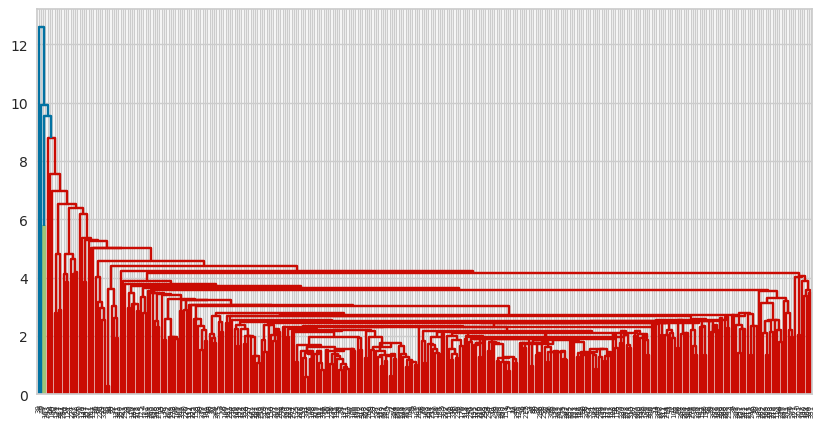

In [202]:
#grafica del dendrograma
plt.figure(figsize = (10,5))
dendrogram(hikerical_centr)
plt.show()

In [203]:
# usando linkage
# Enlace promedio y metrica euclidea
hikerical_av=  linkage(hc_df, "average", metric = "euclidean")

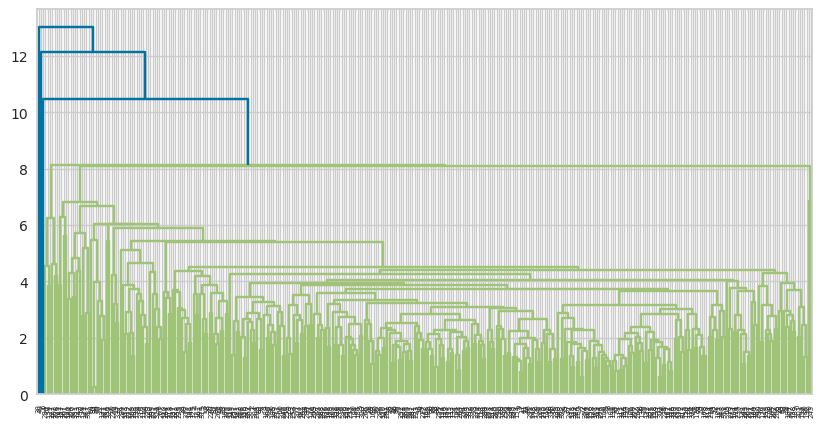

In [204]:
#grafica del dendrograma
plt.figure(figsize = (10,5))
dendrogram(hikerical_av)
plt.show()

* Se recomienda su uso cuando son pocas observaciones, agencias, regiones, sectores economicos, perfiles de clientes etc
* Se esta usando solo con fines ilustrativos

In [205]:
#Enlace completo y metrica euclidea
hikerical_c=  linkage(X_scaled, "complete", metric = "euclidean")

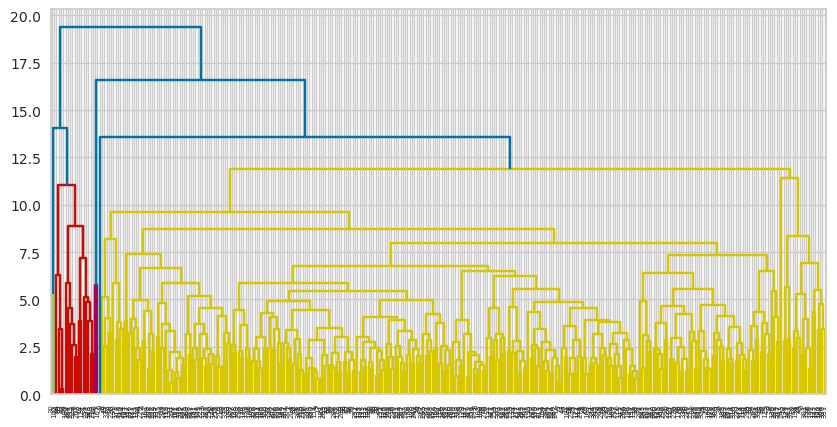

In [206]:
#grafica del dendrograma
plt.figure(figsize = (10,5))
dendrogram(hikerical_c)
plt.show()

In [207]:
# Enlace Ward y metrica euclidea
hikerical_ward=  linkage(X_scaled, "ward", metric = "euclidean")

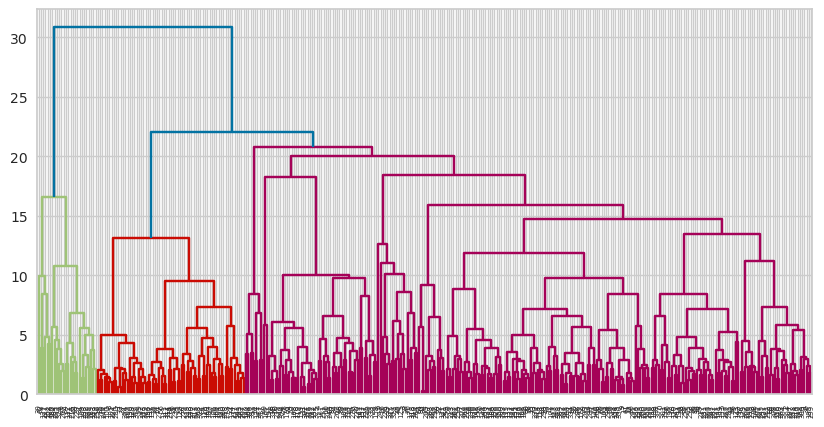

In [208]:
#grafica del dendrograma
plt.figure(figsize = (10,5))
dendrogram(hikerical_ward)
plt.show()

#### Otra forma de crear los cluster

In [209]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='centroid')  
HCmodel.fit(hc_df)

ValueError: Unknown linkage type centroid. Valid options are dict_keys(['ward', 'complete', 'average', 'single'])

**Observaciones**
* Lamentablemente en la biblioteca de scikit-learn para el modelo de AgglomerativeClustering, el método de enlace 'centroid' no es soportado. Los métodos de enlace que soporta son: 'ward', 'complete', 'average', y 'single'.
* Revisando tus resultados anteriores, parece que el siguiente método con la correlación más alta fue 'average' con la métrica de distancia 'euclidean'. Por lo tanto, vamos a utilizar este como metodo de vinculación

In [210]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [211]:
# Creamos una copia del dataframe original
df2 = df.copy()

# adicionando  al hierical cluster
data["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Caracteristicas de los cluster

In [212]:
data["HC_segments"].value_counts()

0    337
3      1
1      1
2      1
Name: HC_segments, dtype: int64

**Observaciones**
* Probando el algoritmo de cluster jerarquico sobre los mejores datos segun la prueba cofenética nos arroja cluster desbalanceados
* Probando los dendogramas, podemos notar que el que mejor se adecua a los cluster es el que tiene una similitud de tipo **ward** asi que probaremos el modelo con este metodo.

In [213]:
import time
start_time = time.time()

HCmodel = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
HCmodel.fit(hc_df)

end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")

Tiempo de ejecución: 0.003065824508666992 segundos


In [214]:
# Creamos una copia del dataframe original
df2 = df.copy()

# adicionando  al hierical cluster
data["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [215]:
data["HC_segments"].value_counts()

0    241
2     65
1     26
3      8
Name: HC_segments, dtype: int64

In [216]:
data.groupby("HC_segments").mean()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,KM_segments
HC_segments,,,,,,,,,,,,
0,4.086927,6.109487,0.366422,2.854228,4.027719,2.624521e+08,1.730633e+09,3.843672,19.653093,3.038508,-1.195147,1.323651
1,3.360336,-14.803611,0.998046,3.317194,3.135630,-4.689057e+08,-4.128147e+09,-9.942308,19.737582,4.303275,1.262760,2.923077
2,4.337422,4.115983,0.137051,2.612224,2.501223,-7.200937e+07,8.475400e+08,3.448462,19.184807,3.214408,-4.313864,0.200000
3,4.175186,3.944306,0.099718,3.157520,3.663841,-3.437000e+09,1.790625e+10,6.511250,21.871255,2.459797,-6.075630,2.000000


* Volatility -> 1
* Cash Ratio -> 0
* Estimated Shares Outstanding -> 3

In [217]:
pd.crosstab(data['HC_segments'], data['GICS Sector'])

GICS Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
HC_segments,,,,,,,,,,,
0,36,17,6,46,36,42,29,13,11,2,3
1,0,0,23,0,1,0,1,1,0,0,0
2,4,2,0,0,2,11,2,6,16,1,21
3,0,0,1,3,1,0,1,0,0,2,0


* Para la columna GICS Sector notamos
* Consumer Discretionary -> 0
* Consumer Staples -> 0
* Energy -> 1
* Financials -> 0
* Health Care -> 0
* Industrials -> 0
* la mayoria de las subcategorias de la variable GICS Sector se estan ubicando en el cluster 0

In [218]:
pd.crosstab(data['HC_segments'], data['GICS Sub Industry'])

GICS Sub Industry,Advertising,Aerospace & Defense,Agricultural Products,Air Freight & Logistics,Airlines,Alternative Carriers,"Apparel, Accessories & Luxury Goods",Application Software,Asset Management & Custody Banks,Auto Parts & Equipment,Automobile Manufacturers,Banks,Biotechnology,Brewers,Broadcasting & Cable TV,Building Products,Cable & Satellite,Casinos & Gaming,Computer Hardware,Construction & Farm Machinery & Heavy Trucks,Construction Materials,Consumer Electronics,Consumer Finance,Copper,Data Processing & Outsourced Services,Distributors,Diversified Chemicals,Diversified Commercial Services,Diversified Financial Services,Drug Retail,Electric Utilities,Electrical Components & Equipment,Electronic Components,Electronic Equipment & Instruments,Environmental Services,Fertilizers & Agricultural Chemicals,Financial Exchanges & Data,Gold,Health Care Distributors,Health Care Equipment,Health Care Facilities,Health Care Supplies,Home Entertainment Software,Home Furnishings,Homebuilding,"Hotels, Resorts & Cruise Lines",Household Appliances,Household Products,Housewares & Specialties,Human Resource & Employment Services,IT Consulting & Other Services,Industrial Conglomerates,Industrial Gases,Industrial Machinery,Industrial Materials,Insurance Brokers,Integrated Oil & Gas,Integrated Telecommunications Services,Internet & Direct Marketing Retail,Internet Software & Services,Investment Banking & Brokerage,Leisure Products,Life & Health Insurance,Life Sciences Tools & Services,Managed Health Care,Metal & Glass Containers,Motorcycle Manufacturers,Multi-Sector Holdings,Multi-line Insurance,MultiUtilities,Networking Equipment,Office REITs,Oil & Gas Equipment & Services,Oil & Gas Exploration & Production,Oil & Gas Refining & Marketing & Transportation,Packaged Foods & Meats,Paper Packaging,Personal Products,Pharmaceuticals,Property & Casualty Insurance,Publishing,REITs,Railroads,Real Estate Services,Regional Banks,Research & Consulting Services,Residential REITs,Restaurants,Retail REITs,Semiconductor Equipment,Semiconductors,Soft Drinks,Specialized REITs,Specialty Chemicals,Specialty Retail,Specialty Stores,Steel,"Technology Hardware, Storage & Peripherals","Technology, Hardware, Software and Supplies",Thrifts & Mortgage Finance,Tires & Rubber,Tobacco,Trucking,Water Utilities
HC_segments,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,4,1,3,5,1,1,1,4,2,2,7,6,1,2,4,3,1,1,3,2,1,5,0,2,1,5,1,7,1,1,1,2,1,0,2,1,1,2,11,5,2,1,1,2,4,1,3,1,1,2,9,0,5,1,3,1,1,4,10,2,2,3,0,5,0,1,1,1,2,1,0,1,0,4,4,1,1,5,8,1,8,4,1,3,0,1,3,1,1,6,4,0,1,0,0,1,1,1,1,1,2,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,16,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,1,0,2,0,0,0,1,0,1,0,0,0,9,0,1,0,0,0,2,1,0,0,0,0,6,0,0,0,4,3,0,3,0,0,0,3,3,1,3,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* No vemos mucha distinción entren los cluster para las subcategorias

## K-means vs Agrupamiento jerárquico

Comparas varias cosas, como:
- ¿Qué técnica de agrupamiento tardó menos en ejecutarse?
- ¿Qué técnica de agrupamiento le dio más agrupaciones distintas, o son lo mismo?
- ¿Cuántas observaciones hay en los conglomerados similares de ambos algoritmos?
- ¿Cuántos clústeres se obtienen como el número apropiado de clústeres de ambos algoritmos?

También puede mencionar cualquier diferencia o similitud que haya obtenido en los perfiles de clúster de ambas técnicas de agrupación.

#### ¿Qué técnica de agrupamiento tardó menos en ejecutarse?
* kmeans con 4 cluster
Tiempo de ejecución: 0.1238713264465332 segundos

* jerarquico con 4 cluster
Tiempo de ejecución: 0.0029311180114746094 segundos

#### ¿Qué técnica de agrupamiento le dio más agrupaciones distintas, o son lo mismo?
Considerando las ténica utilizadas podemos mencionar
* Diagrama del codo usando la inercia como punto de comparación
    * Número de cluster: 3 	inercia: 3588.652299923584
    * Número de cluster: 4 	inercia: 3337.765039270267
    * Número de cluster: 5 	inercia: 3136.959058895721
        * Tomando como consideración entre el cluster 3,4 y 5.
        

* Diagrama del codo usando la distorción como punto de comparación
    * Número de cluster: 3 	Distorción promedio: 2.9736863320492284
    * Número de cluster: 4 	Distorción promedio: 2.83583895970935
        * Tomando como consideración entre el cluster 3 y 4.
        

* Segun la libreria KElbowVisualizer
    * 5 clusters, sim embargo a simple vista no vemos mucha distancia con el cluster 4 y el cluster 5

#### ¿Cuántas observaciones hay en los conglomerados similares de ambos algoritmos?

* Tomando como 4 el numero optimo de cluster se obtuvo lo siguiente

In [219]:
# para cluster kmeans
data["KM_segments"].value_counts()

1    128
2    103
0     79
3     30
Name: KM_segments, dtype: int64

In [220]:
# para cluster jerarquico
data["HC_segments"].value_counts()

0    241
2     65
1     26
3      8
Name: HC_segments, dtype: int64

**conclusiones**
* Distribución de los clusters: En ambos casos, la distribución de las observaciones en los clusters es desigual, pero la desigualdad es más pronunciada en el método jerárquico. En el método KMeans, la cantidad de observaciones en los clusters varía desde 30 hasta 128, mientras que en el método jerárquico varía desde 8 hasta 241. Esto sugiere que el método KMeans ha logrado una distribución más equilibrada de las observaciones entre los clusters.

* Número de observaciones en los clusters más grandes: En ambos casos, el cluster más grande contiene la mayoría de las observaciones, pero la proporción de observaciones en el cluster más grande es mucho mayor en el método jerárquico (241 de 340 observaciones, o alrededor del 71%) que en el método KMeans (128 de 340 observaciones, o alrededor del 38%). Esto podría sugerir que el método KMeans es más efectivo en la identificación de subgrupos distintos dentro de tus datos.

* Número de observaciones en los clusters más pequeños: En el método KMeans, el cluster más pequeño tiene 30 observaciones, mientras que en el método jerárquico, el cluster más pequeño tiene sólo 8 observaciones. Esto podría indicar que el método KMeans es más efectivo en identificar grupos más pequeños que son distintos del grupo principal.

####  ¿Cuántos clústeres se obtienen como el número apropiado de clústeres de ambos algoritmos?
* Para el algoritmo kmeans se obtuvo como numero de cluster apropiados "4", mientras que para el cluster jerarquico se obtuvo entre 3 a 4 cluster, sin embargo tambien se analizó la distribución de estos cluster, y que tengan proporciones similares y no disparejos.


## Información práctica y recomendaciones

**Conclusiones**
* Número de clusters: En ambos casos, el número óptimo de clusters fue 4, lo que sugiere que este es un número razonable para agrupar tus datos. No obstante, no todos los métodos van a funcionar igual de bien con el mismo número de clusters, así que siempre es buena idea probar diferentes números de clusters si los resultados no son claros.


* Distribución de las observaciones: Aunque utilizaste 4 clusters para ambos algoritmos, la distribución de las observaciones en los clusters es distinta. En K-means, los datos se distribuyen de manera más uniforme entre los clusters en comparación con el método jerárquico. Esto puede ser indicativo de que el algoritmo de K-means está capturando de manera más efectiva la estructura subyacente de tus datos.